In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cc_df = pd.read_excel('default of credit card clients.xls')
cc_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
cc_df = pd.read_excel('default of credit card clients.xls', header=1)
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
cc_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [7]:
cc_df['SEX'].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [8]:
cc_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
cc_df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

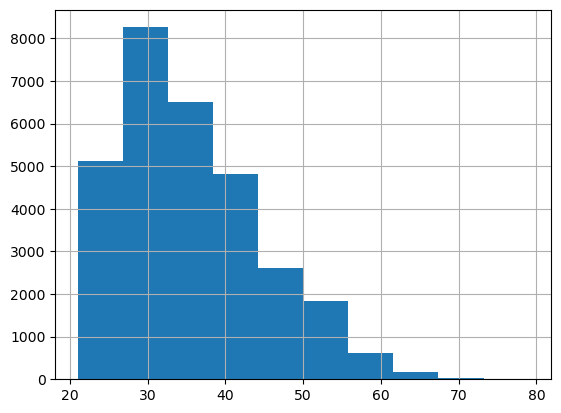

In [10]:
cc_df['AGE'].hist()
plt.show()

In [14]:
# Subset the dataframe for 30 year old customers

thirties_df = cc_df[cc_df['AGE'] == 30]
thirties_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
27,28,50000,2,3,2,30,0,0,0,0,...,17878,18931,19617,1300,1300,1000,1500,1000,1012,0
35,36,160000,1,1,2,30,-1,-1,-2,-2,...,-923,-1488,-1884,131,396,396,565,792,0,0
44,45,40000,2,1,2,30,0,0,0,2,...,25209,26636,29197,3000,5000,0,2000,3000,0,0
67,68,210000,2,1,2,30,2,-1,-1,-1,...,2280,300,4250,300,1159,2280,300,4250,909,0


In [15]:
# Whats the average credit limits for 30 year old customers?

thirties_df['LIMIT_BAL'].mean()

189591.39784946237

In [17]:
# Whats the average Credit Limits for every Age?

avg_cc_limits_age = cc_df.groupby('AGE')['LIMIT_BAL'].mean().reset_index()

# What are the top5 Age categories who have highest Avg Credit Limits?
avg_cc_limits_age.sort_values(by='LIMIT_BAL', ascending=False).head()

,AGE,LIMIT_BAL
55,79,440000.000000
52,73,270000.000000
45,66,252000.000000
48,69,236000.000000
43,64,232258.064516


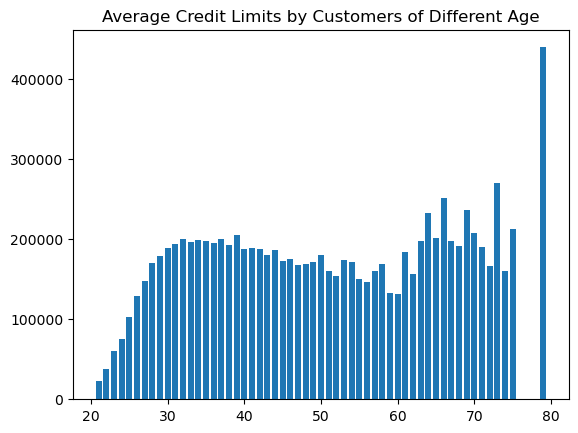

In [18]:
plt.bar(avg_cc_limits_age['AGE'], avg_cc_limits_age['LIMIT_BAL'])
plt.title('Average Credit Limits by Customers of Different Age')
plt.show()

In [19]:
# Whats the average Credit Limits for different EDUCATIONAL QUALIFICATIONS?

avg_cc_limits_edu = cc_df.groupby('EDUCATION')['LIMIT_BAL'].mean().reset_index()

# What are the top5 EDUCATION QUALIFICATION categories who have highest Avg Credit Limits?
avg_cc_limits_edu.sort_values(by='LIMIT_BAL', ascending=False).head()

,EDUCATION,LIMIT_BAL
4,4,220894.308943
0,0,217142.857143
1,1,212956.069910
5,5,168164.285714
6,6,148235.294118


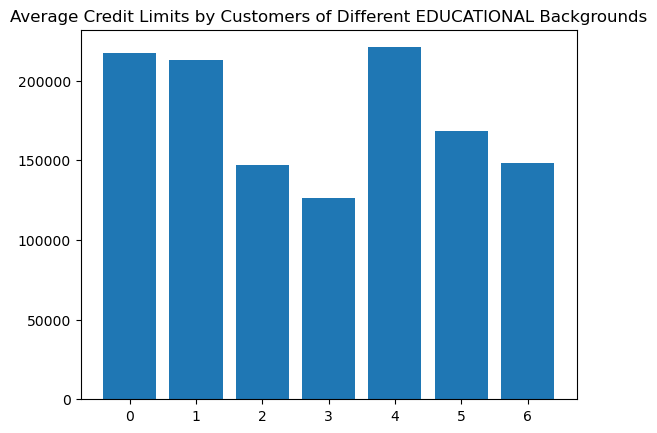

In [20]:
plt.bar(avg_cc_limits_edu['EDUCATION'], avg_cc_limits_edu['LIMIT_BAL'])
plt.title('Average Credit Limits by Customers of Different EDUCATIONAL Backgrounds')
plt.show()

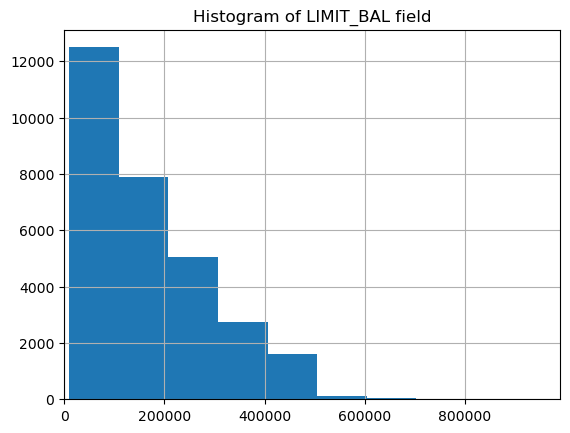

In [21]:
# Histogram of the Credit Limit field.

cc_df['LIMIT_BAL'].hist()
plt.xlim(0,990000)
plt.title('Histogram of LIMIT_BAL field')
plt.show()

In [22]:
# How many Males / Females have defaulted a payment?

gender_def_grp = cc_df.groupby('SEX')['default payment next month'].count()
gender_def_grp

SEX
1    11888
2    18112
Name: default payment next month, dtype: int64

<AxesSubplot:xlabel='SEX'>

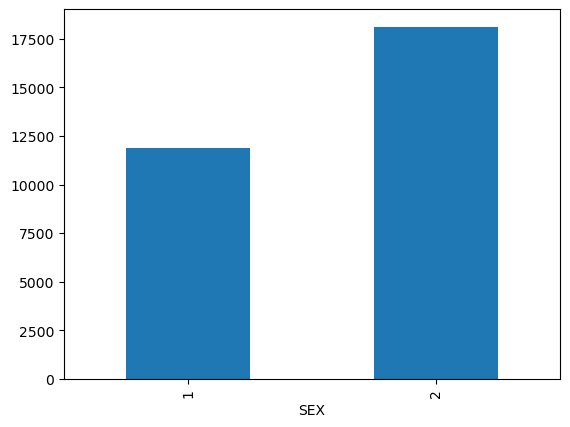

In [23]:
gender_def_grp.plot(kind='bar')

In [24]:
# Whats the defaulter distribution across different Educational Qualifications?

edu_def_grp = cc_df.groupby('EDUCATION')['default payment next month'].count()
edu_def_grp

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: default payment next month, dtype: int64

<AxesSubplot:xlabel='EDUCATION'>

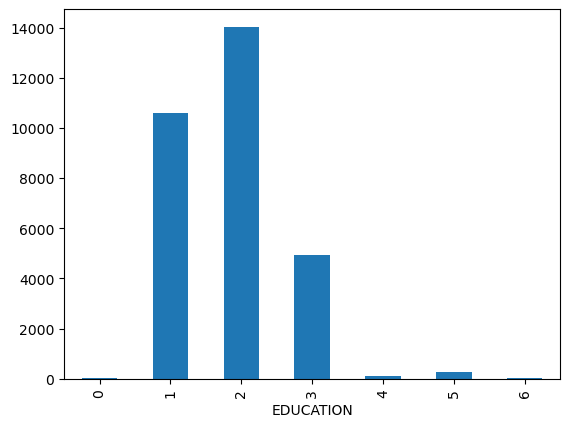

In [25]:
edu_def_grp.plot(kind='bar')